In [53]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import boxcox
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

In [102]:
# Loading the DataFrame
pd.set_option("display.max_columns",100)
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx",engine="openpyxl")

In [103]:
# Checking the head of the Data
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [104]:
# After seeing the data head , the Unnamed: 0 column seems suspicious for me, so checking the values in it
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [105]:
# Dropping the Unnamed: 0 column because it contains only one value
df.drop("Unnamed: 0",axis=1,inplace=True)

In [106]:
# Checking the ID column
df['ID'].nunique()

3998

In [107]:
# Dropping The ID Column
df.drop("ID",axis=1,inplace=True)

In [108]:
# Checking the Shape of the DataFrame
df.shape

(3998, 37)

In [109]:
# Checking the basic Description of the DataFrame
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [110]:
# Checking the Basic info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [111]:
# Checking for the NULL values in the DataFrame
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
d

In [112]:
# Extracting the Numerical_columns from the total columns
numerical_columns = [column for column in df.columns if column not in df.select_dtypes(include="O")]

In [113]:
df[numerical_columns]

,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,1990-02-19,84.30,2007,95.80,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,1989-10-04,85.40,2007,85.00,5807,2,70.06,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,1992-08-03,85.00,2010,68.20,64,2,70.00,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,1989-12-05,85.60,2007,83.60,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,1991-02-27,78.00,2008,76.80,11368,2,73.90,11368,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,1987-04-15,52.09,2006,55.50,6268,2,61.50,6268,0,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,1992-08-27,90.00,2009,93.00,4883,2,77.30,4883,1,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,1991-07-03,81.86,2008,65.50,9786,2,70.00,9786,0,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,1992-03-20,78.72,2010,69.88,979,2,70.42,979,1,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [114]:
numerical_discrete_columns = [column for column in numerical_columns if df[column].nunique() < 25]

In [115]:
df[numerical_discrete_columns]

,12graduation,CollegeTier,CollegeCityTier,GraduationYear,ComputerScience,CivilEngg
0,2007,2,0,2011,-1,-1
1,2007,2,0,2012,-1,-1
2,2010,2,0,2014,-1,-1
3,2007,1,1,2011,-1,-1
4,2008,2,0,2012,-1,-1
...,...,...,...,...,...,...
3993,2006,2,0,2010,-1,-1
3994,2009,2,1,2013,-1,-1
3995,2008,2,0,2012,-1,-1
3996,2010,2,1,2014,438,-1


In [116]:
numerical_columns = [column for column in numerical_columns if column not in numerical_discrete_columns]

In [117]:
df[numerical_columns]

,Salary,DOJ,DOB,10percentage,12percentage,CollegeID,collegeGPA,CollegeCityID,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,MechanicalEngg,ElectricalEngg,TelecomEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,1990-02-19,84.30,95.80,1141,78.00,1141,515,585,525,0.635979,445,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,1989-10-04,85.40,85.00,5807,70.06,5807,695,610,780,0.960603,-1,466,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,1992-08-03,85.00,68.20,64,70.00,64,615,545,370,0.450877,395,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,1989-12-05,85.60,83.60,6920,74.64,6920,635,585,625,0.974396,615,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,1991-02-27,78.00,76.80,11368,73.90,11368,545,625,465,0.124502,-1,233,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,1987-04-15,52.09,55.50,6268,61.50,6268,365,334,475,0.276047,345,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,1992-08-27,90.00,93.00,4883,77.30,4883,415,410,535,0.881620,325,420,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,1991-07-03,81.86,65.50,9786,70.00,9786,475,475,465,0.488348,405,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,1992-03-20,78.72,69.88,979,70.42,979,450,410,320,0.744758,445,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [118]:
df[numerical_discrete_columns].nunique()

12graduation       16
CollegeTier         2
CollegeCityTier     2
GraduationYear     11
ComputerScience    20
CivilEngg          23
dtype: int64

In [119]:
# Looking at the numerical columns
df[numerical_columns].nunique()

Salary                    177
DOJ                        81
DOB                      1872
10percentage              851
12percentage              801
CollegeID                1350
collegeGPA               1282
CollegeCityID            1350
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
conscientiousness         141
agreeableness             149
extraversion              154
nueroticism               217
openess_to_experience     142
dtype: int64

In [120]:
date_columns = ['DOJ',"DOL","DOB"]

In [121]:
present_year = datetime.datetime.now()

In [122]:
df["DOL"].replace("present",present_year,inplace=True)

In [123]:
df[date_columns].dtypes

DOJ    datetime64[ns]
DOL    datetime64[ns]
DOB    datetime64[ns]
dtype: object

In [124]:
# Removing Datetime columns from Numerical columns:
numerical_columns = [column for column in numerical_columns if column not in date_columns]

In [125]:
df[numerical_columns]

,Salary,10percentage,12percentage,CollegeID,collegeGPA,CollegeCityID,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,MechanicalEngg,ElectricalEngg,TelecomEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.30,95.80,1141,78.00,1141,515,585,525,0.635979,445,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.40,85.00,5807,70.06,5807,695,610,780,0.960603,-1,466,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.00,68.20,64,70.00,64,615,545,370,0.450877,395,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,85.60,83.60,6920,74.64,6920,635,585,625,0.974396,615,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,78.00,76.80,11368,73.90,11368,545,625,465,0.124502,-1,233,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,52.09,55.50,6268,61.50,6268,365,334,475,0.276047,345,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,90.00,93.00,4883,77.30,4883,415,410,535,0.881620,325,420,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,81.86,65.50,9786,70.00,9786,475,475,465,0.488348,405,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,78.72,69.88,979,70.42,979,450,410,320,0.744758,445,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [126]:
# Extracting the Categorical Columns
categorical_columns = [column for column in df.columns if column in df.select_dtypes(include="O")]

In [127]:
# Looking at the categorical columns
df[categorical_columns]

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
...,...,...,...,...,...,...,...,...
3993,software engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,information technology,Haryana
3994,technical writer,Hyderabad,f,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana
3995,associate software engineer,Bangalore,m,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa
3996,software developer,Asifabadbanglore,f,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka


In [128]:
categorical_discrete_columns = [column for column in categorical_columns if df[column].nunique() < 25]

In [129]:
df[categorical_discrete_columns].nunique()

Gender    2
Degree    4
dtype: int64

In [130]:
# Building a fuction which will give the number of unique values
def unique_values(df,columns):
    values = []
    for column in columns:
        nunique = df[column].nunique()
        values.append(nunique)
    unique_df = pd.DataFrame({"Columns":columns,"No.of Unique Values":values})
    return unique_df

In [131]:
unique_values(df,numerical_columns)

,Columns,No.of Unique Values
0,Salary,177
1,10percentage,851
2,12percentage,801
3,CollegeID,1350
4,collegeGPA,1282
5,CollegeCityID,1350
6,English,111
7,Logical,107
8,Quant,138
9,Domain,243


In [132]:
unique_values(df,numerical_discrete_columns)

,Columns,No.of Unique Values
0,12graduation,16
1,CollegeTier,2
2,CollegeCityTier,2
3,GraduationYear,11
4,ComputerScience,20
5,CivilEngg,23


Text(0.5, 1.0, 'Frquency of CollegeTier')

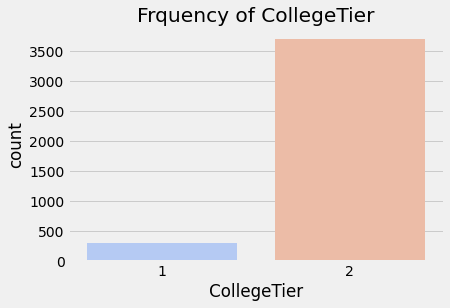

In [133]:
# Confirming that whether they are categorical columns or not
sns.countplot(df['CollegeTier'],palette="coolwarm")
plt.title("Frquency of CollegeTier")

Text(0.5, 1.0, 'Frequency of CollegeCityTier')

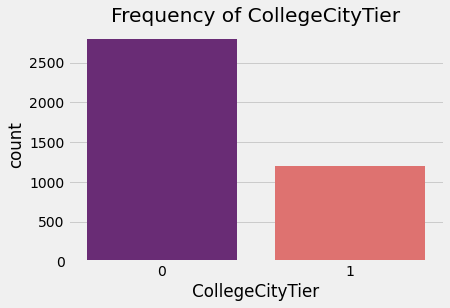

In [134]:
sns.countplot(df['CollegeCityTier'],palette="magma")
plt.title("Frequency of CollegeCityTier")

In [135]:
score_columns = ["ComputerProgramming","ElectronicsAndSemicon","ComputerScience",
                "MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"]

In [136]:
numerical_columns = [col for col in numerical_columns if col not in score_columns]

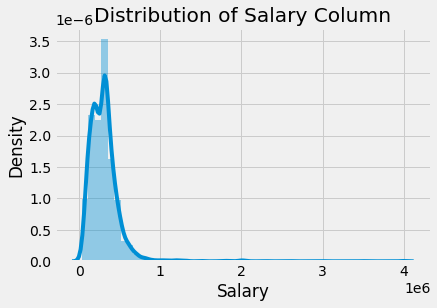

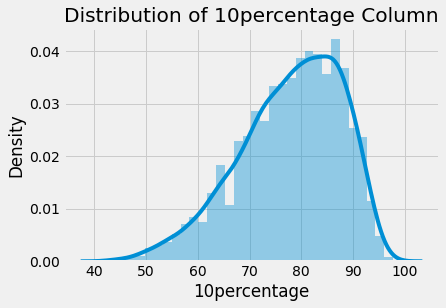

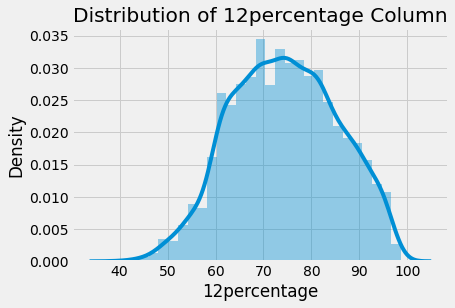

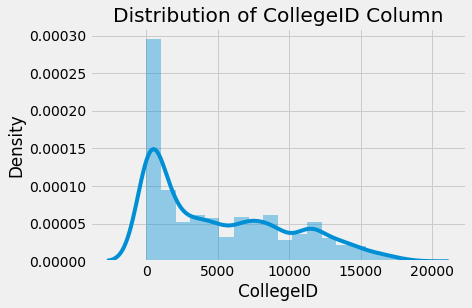

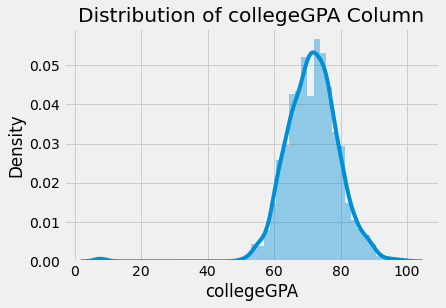

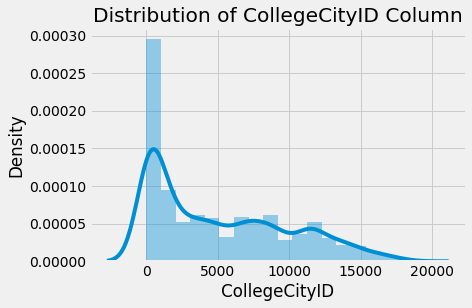

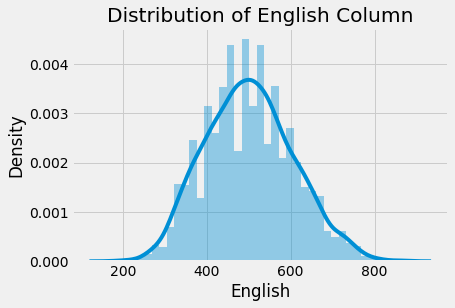

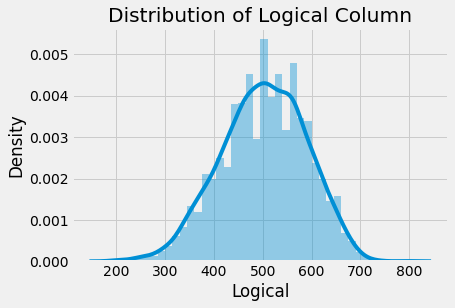

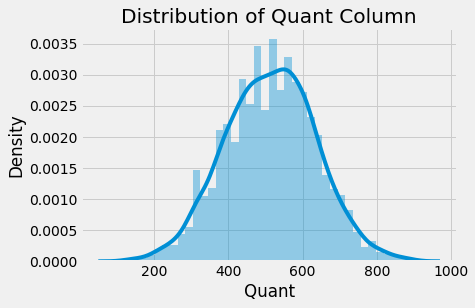

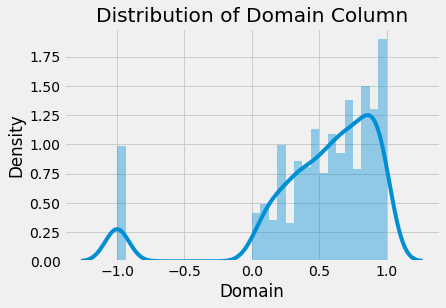

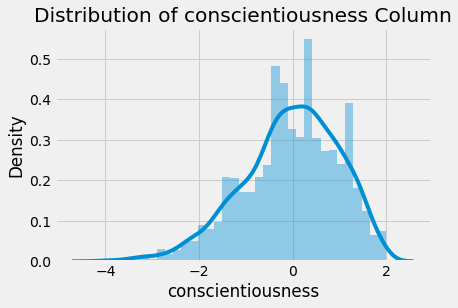

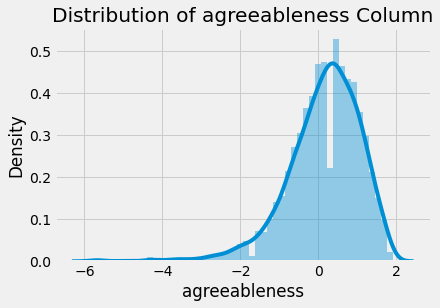

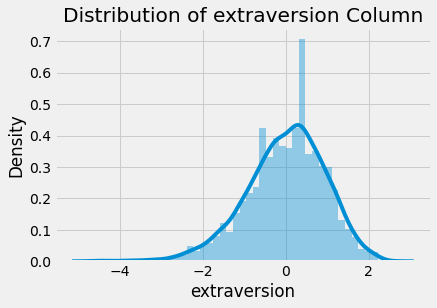

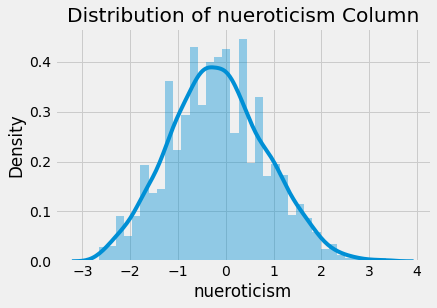

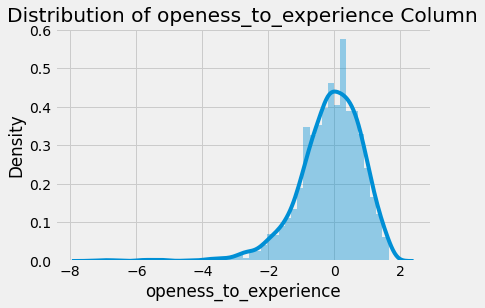

In [137]:
for column in numerical_columns:
    sns.distplot(df[column])
    plt.title(f"Distribution of {column} Column")
    plt.show()

In [138]:
marker = dict(markerfacecolor='yellow',markeredgecolor='red',markersize=15,marker='o')

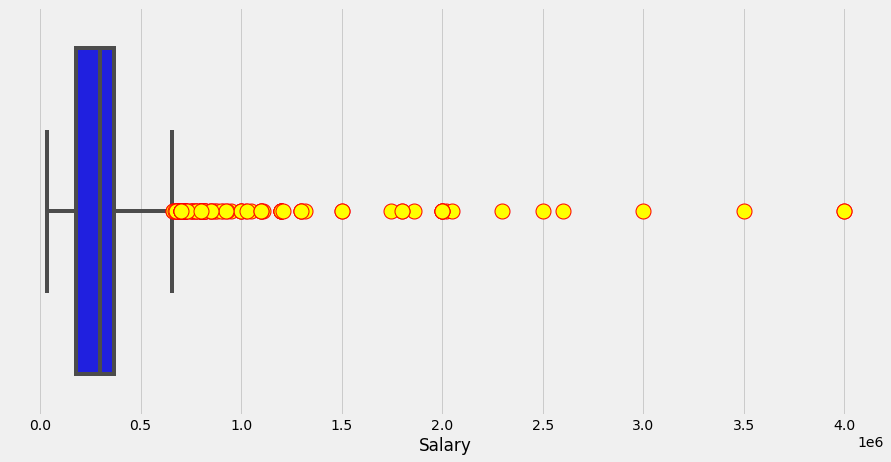

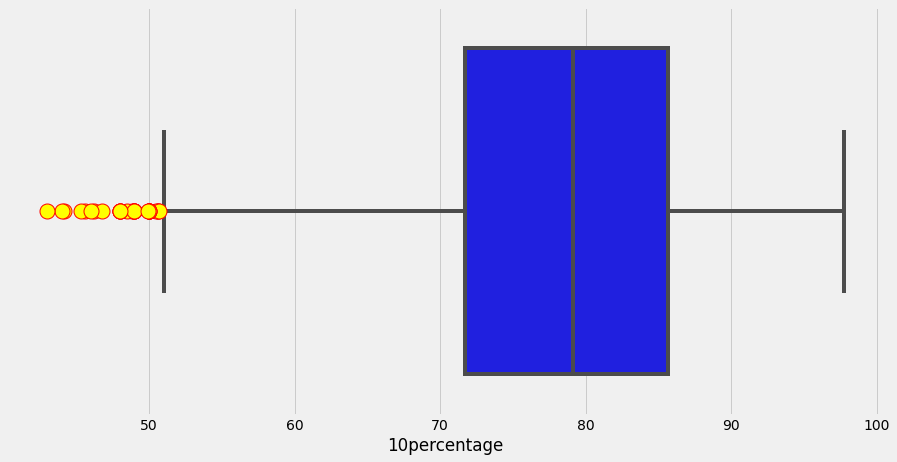

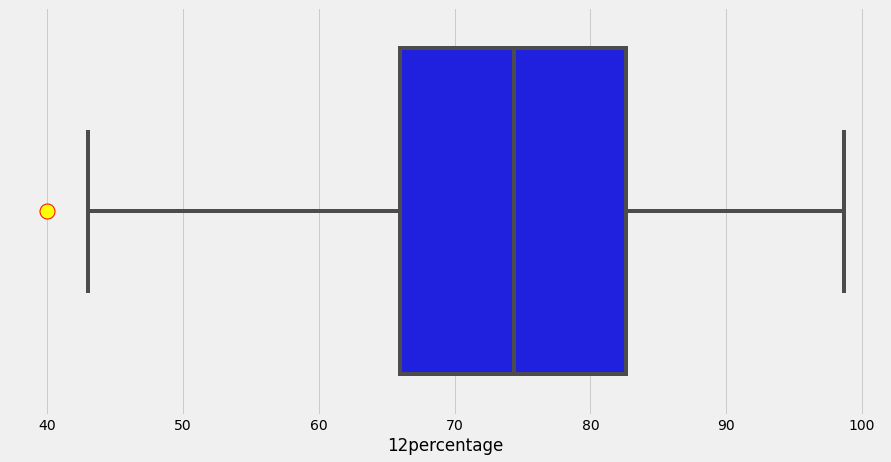

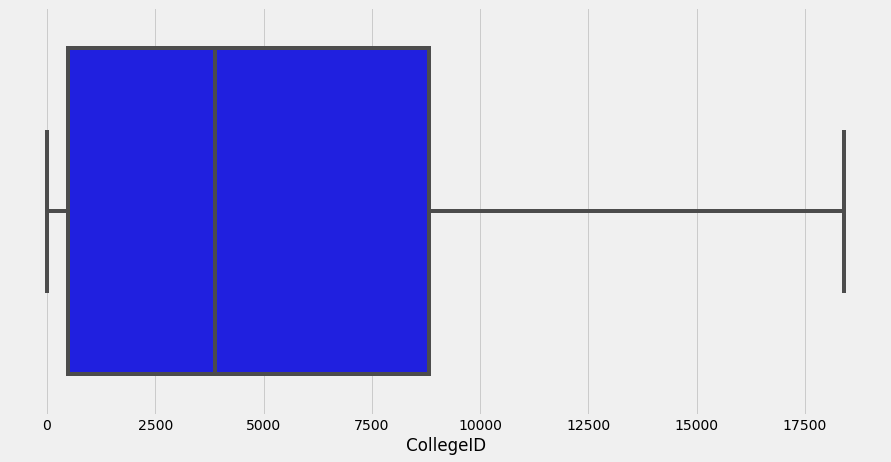

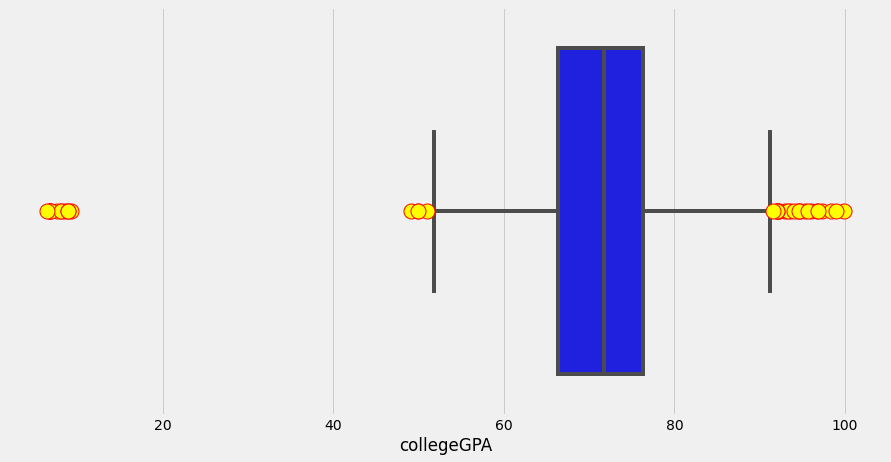

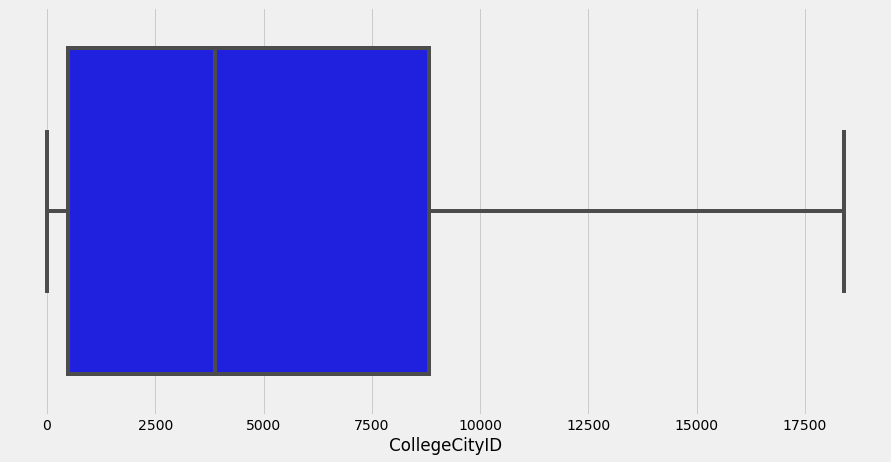

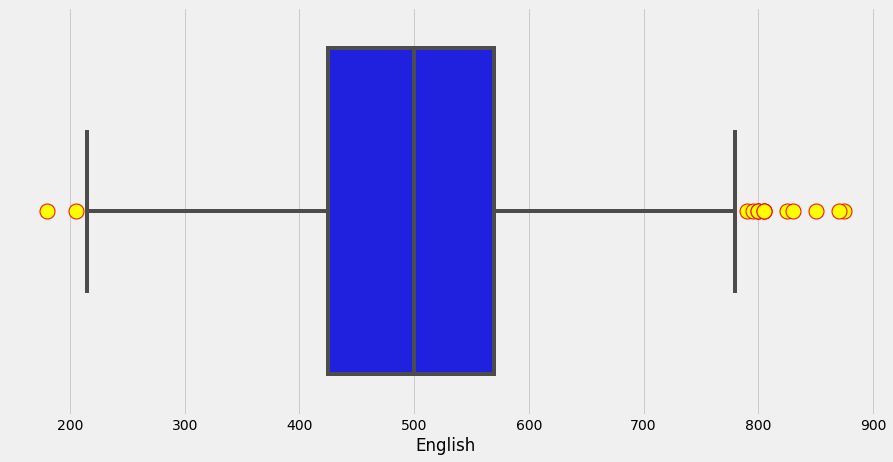

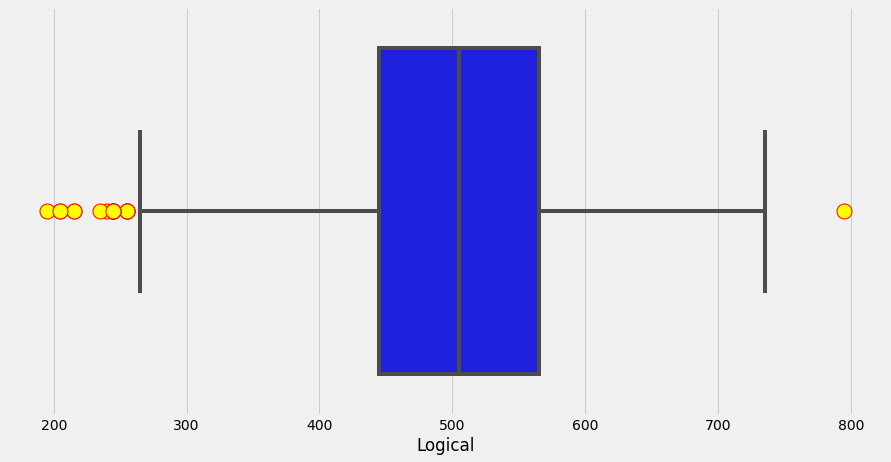

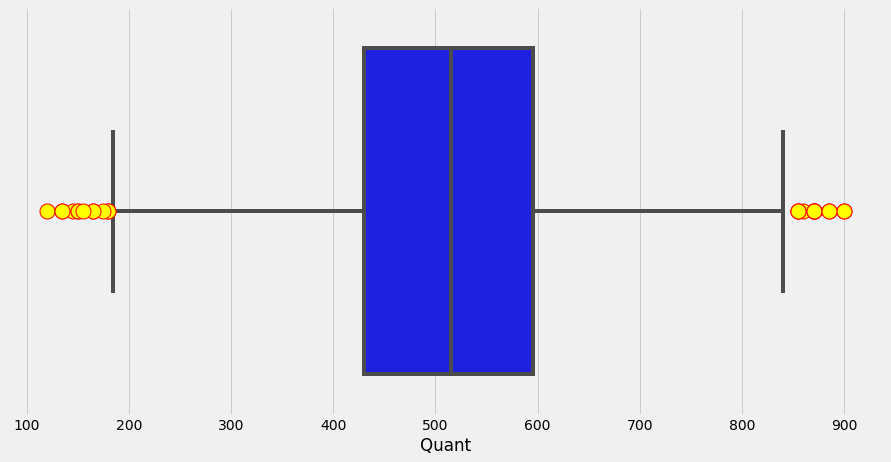

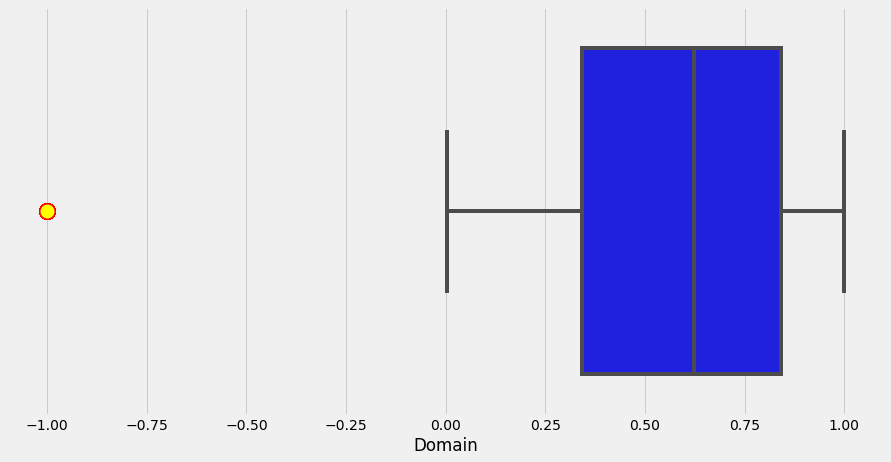

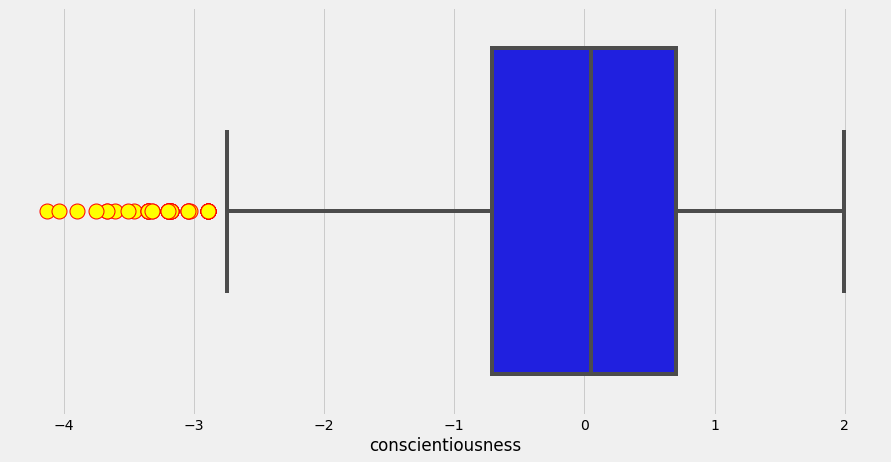

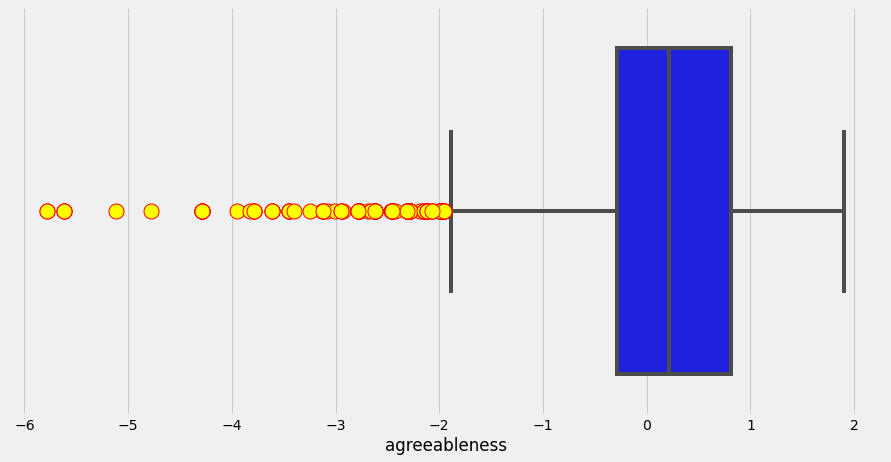

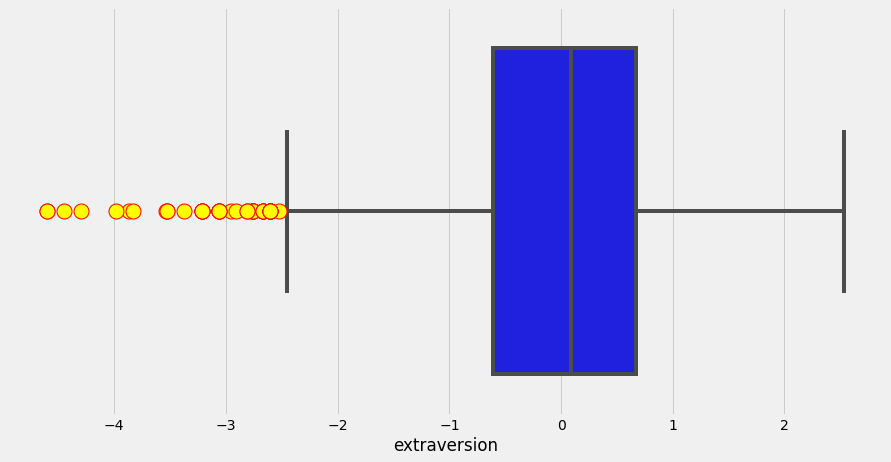

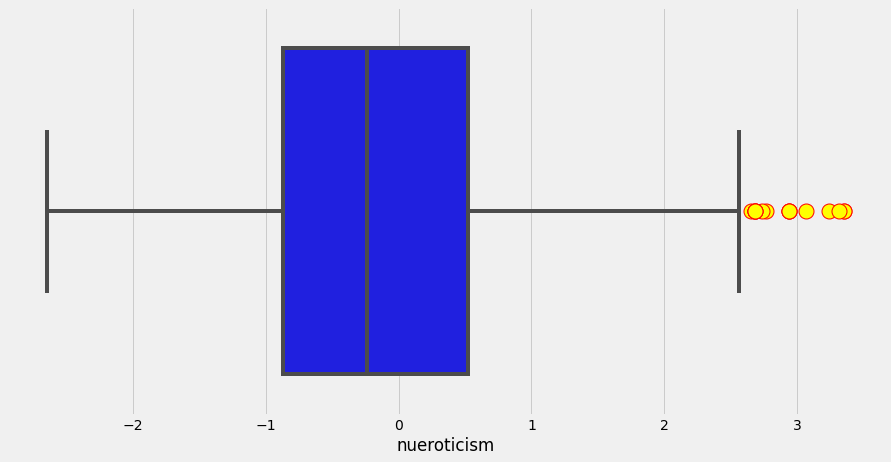

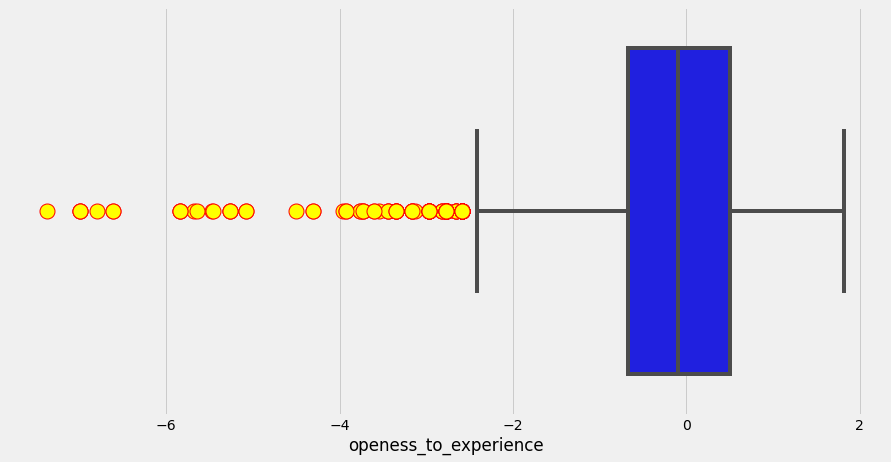

In [139]:
for column in numerical_columns:
    plt.figure(figsize=(14,7))
    sns.boxplot(df[column],color='blue',flierprops=marker)
    plt.show()

In [140]:
# Let's try to remove the Outliers in the numerical columns
def remove_outliers(data,columns):
    for column in columns:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        lower_boundary = np.percentile(data[column],25) - (1.5 * iqr)
        upper_boundary = np.percentile(data[column],75) + (1.5 * iqr)
#         print(iqr,lower_boundary,upper_boundary)
        data = data[(data[column] >= lower_boundary) & (data[column] <= upper_boundary)]
    return data

In [141]:
x = df.copy()

In [142]:
new_df = remove_outliers(x,numerical_columns)
df = new_df.copy()

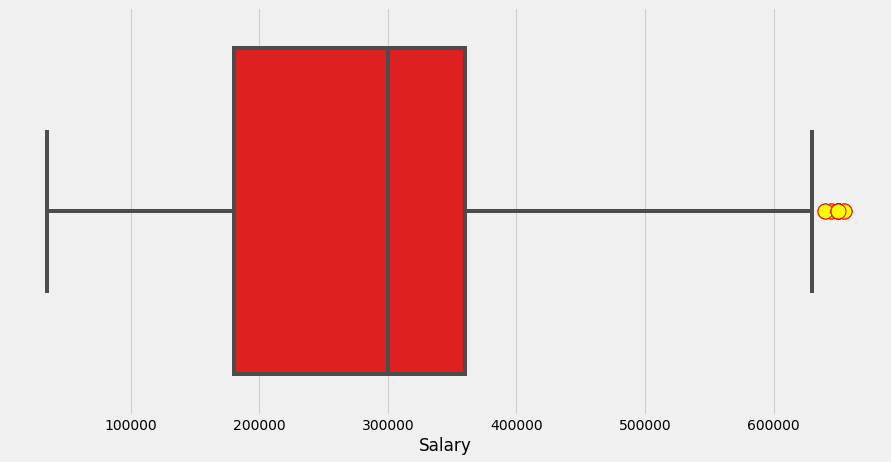

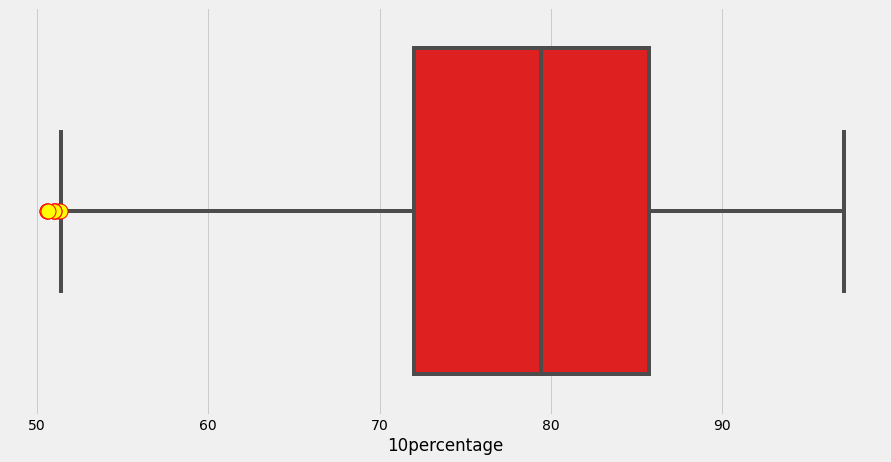

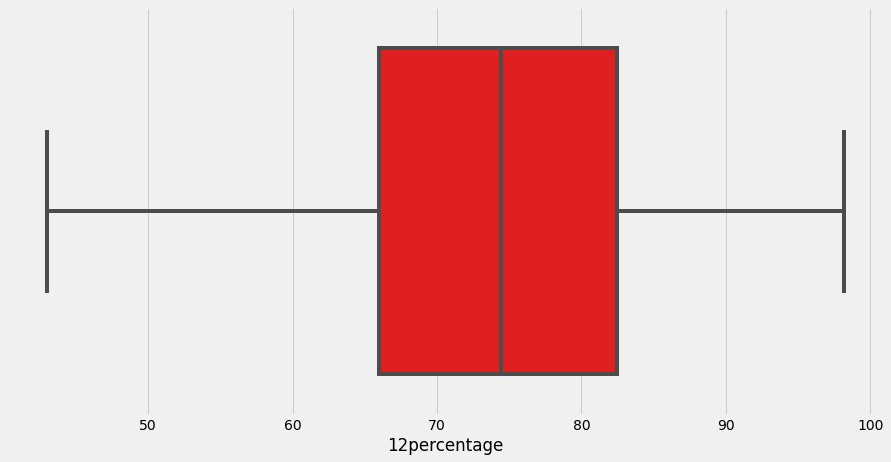

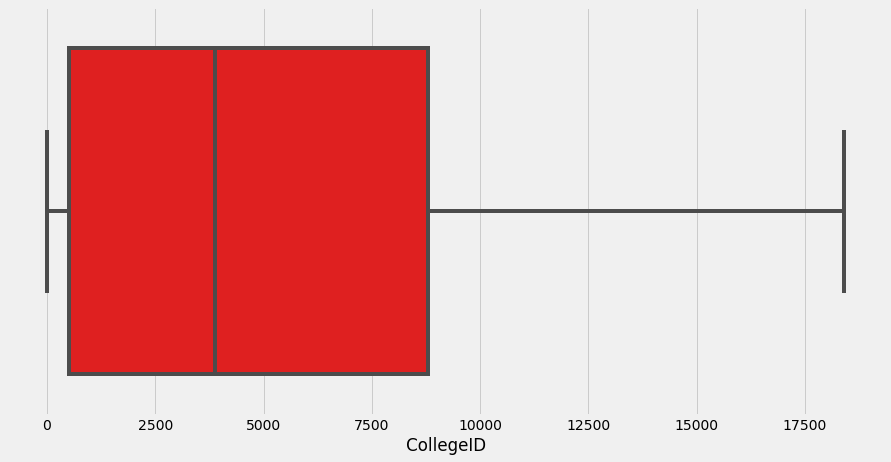

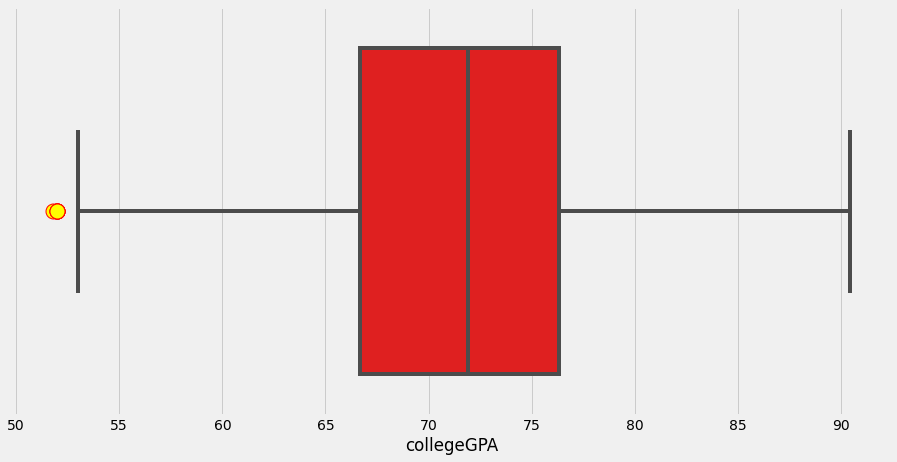

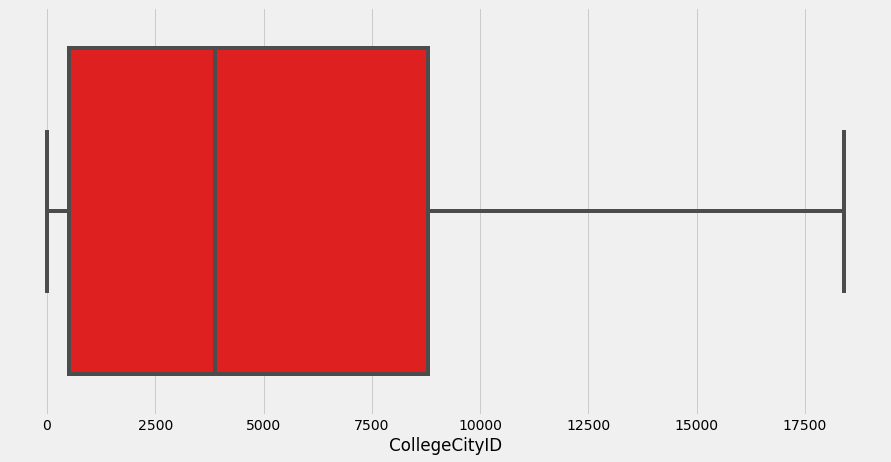

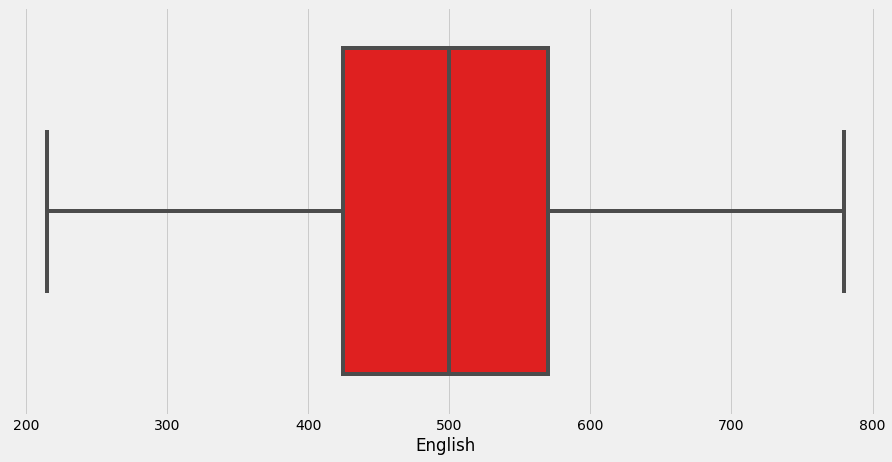

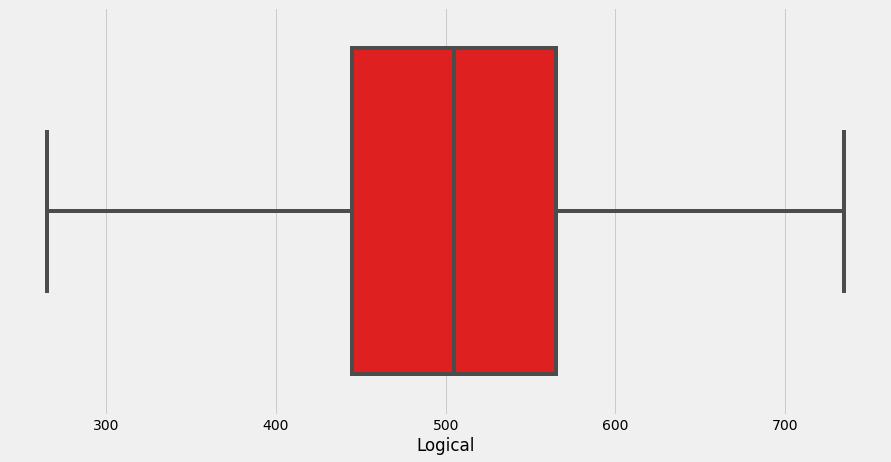

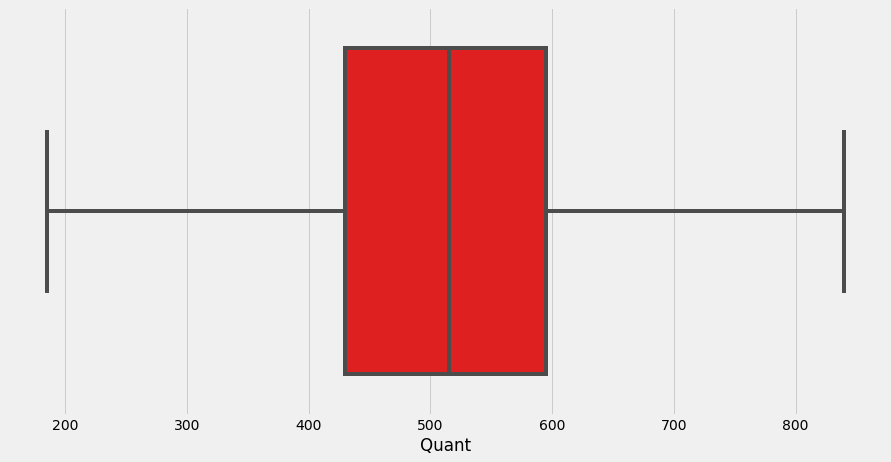

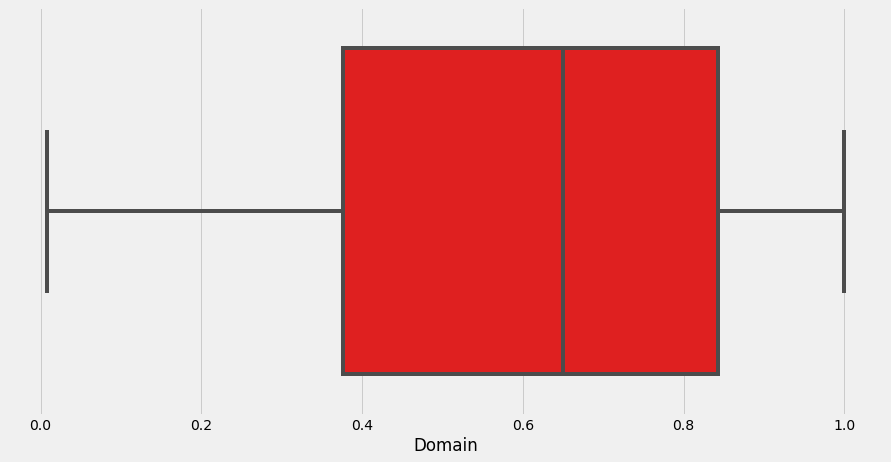

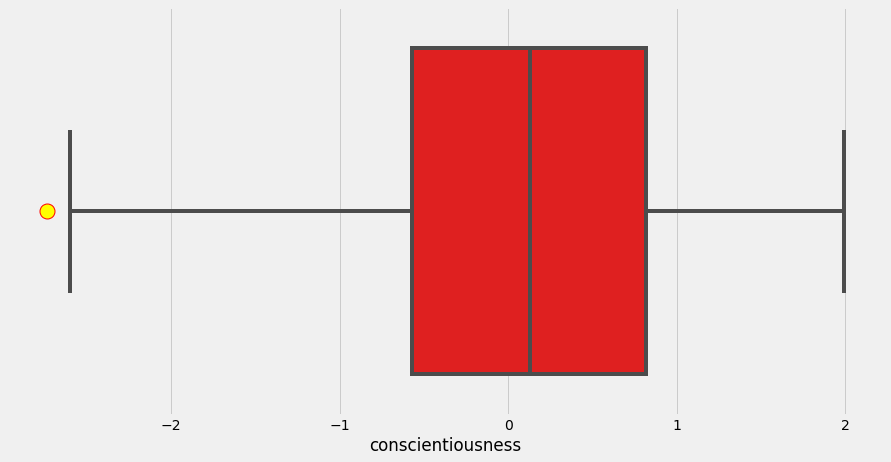

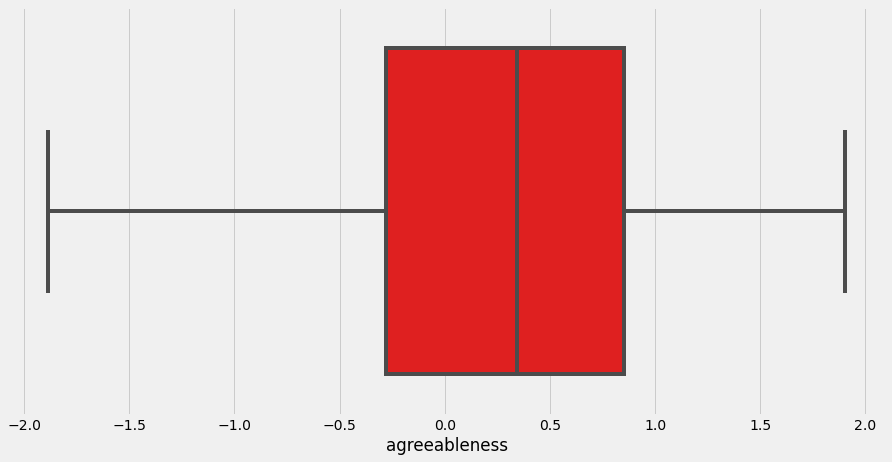

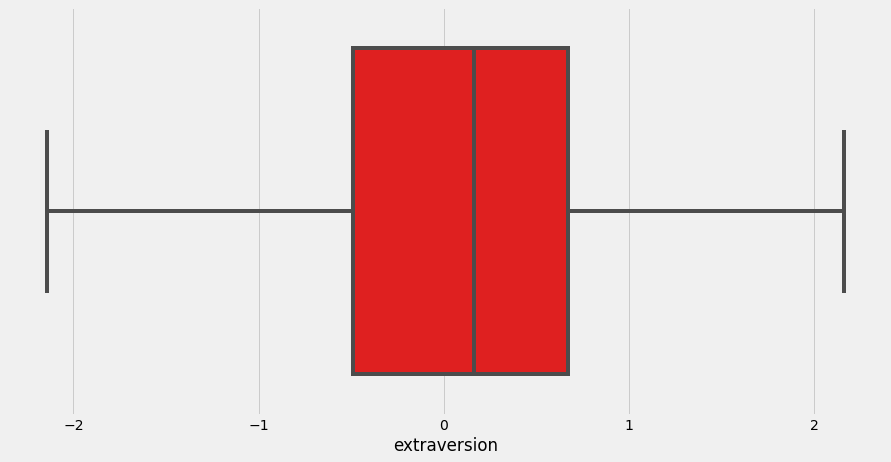

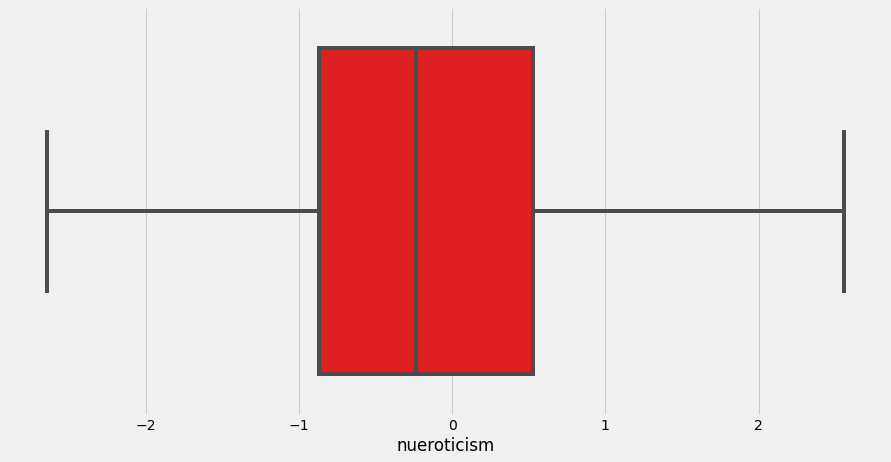

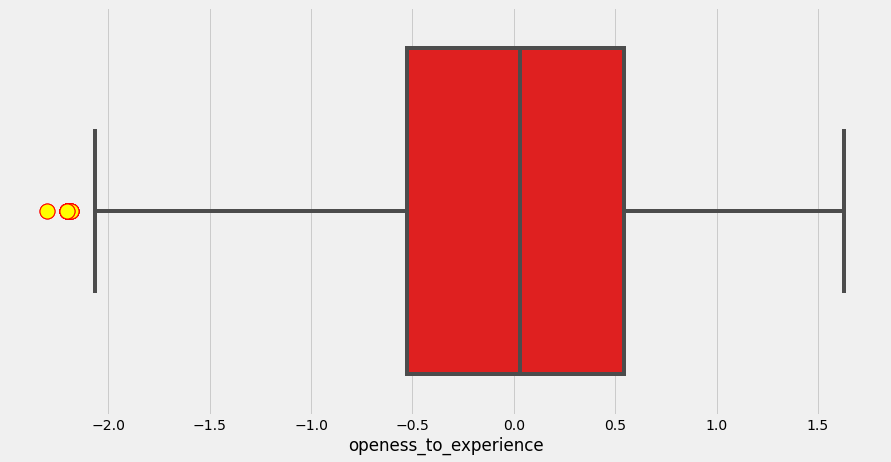

In [143]:
for column in numerical_columns:
    plt.figure(figsize=(14,7))
    sns.boxplot(df[column],color='red',flierprops=marker)
    plt.show()

In [144]:
df[numerical_columns]

,Salary,10percentage,12percentage,CollegeID,collegeGPA,CollegeCityID,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.30,95.80,1141,78.00,1141,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.40,85.00,5807,70.06,5807,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.00,68.20,64,70.00,64,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
4,200000,78.00,76.80,11368,73.90,11368,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
6,300000,86.08,67.50,314,72.98,314,590,435,380,0.356536,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,52.09,55.50,6268,61.50,6268,365,334,475,0.276047,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,90.00,93.00,4883,77.30,4883,415,410,535,0.881620,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,81.86,65.50,9786,70.00,9786,475,475,465,0.488348,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,78.72,69.88,979,70.42,979,450,410,320,0.744758,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [145]:
unique_values(df,score_columns)

,Columns,No.of Unique Values
0,ComputerProgramming,77
1,ElectronicsAndSemicon,29
2,ComputerScience,19
3,MechanicalEngg,40
4,ElectricalEngg,30
5,TelecomEngg,26
6,CivilEngg,16


In [146]:
# Checcking the Description of score_columns
df[score_columns].describe()

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,362.365832,99.810444,95.697253,22.299427,17.549049,33.917597,1.925445
std,199.561021,160.292736,179.320245,96.971180,89.941584,107.507109,32.460049
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,315.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,425.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,495.000000,260.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000


In [147]:
# Most of the features are in Normal and some of them are a bit Skewed

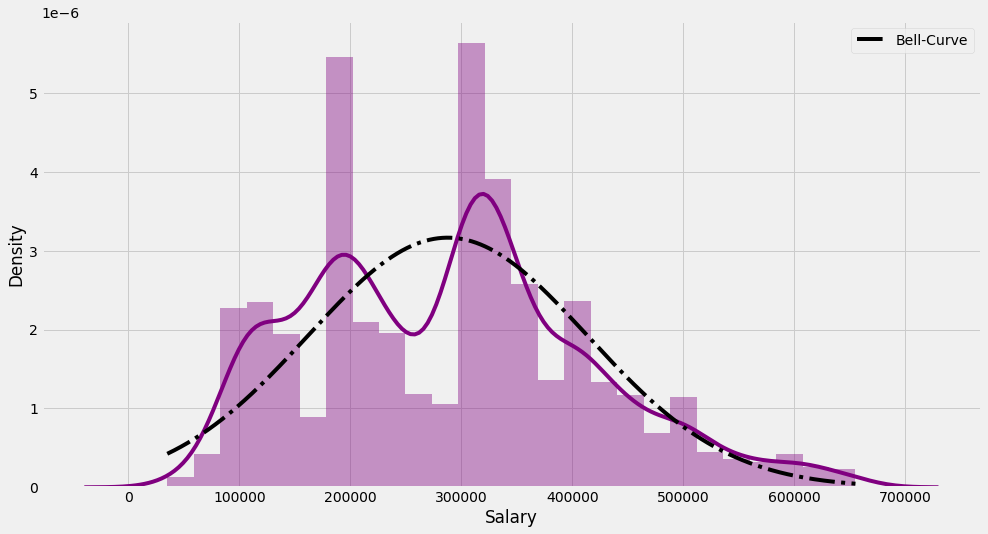

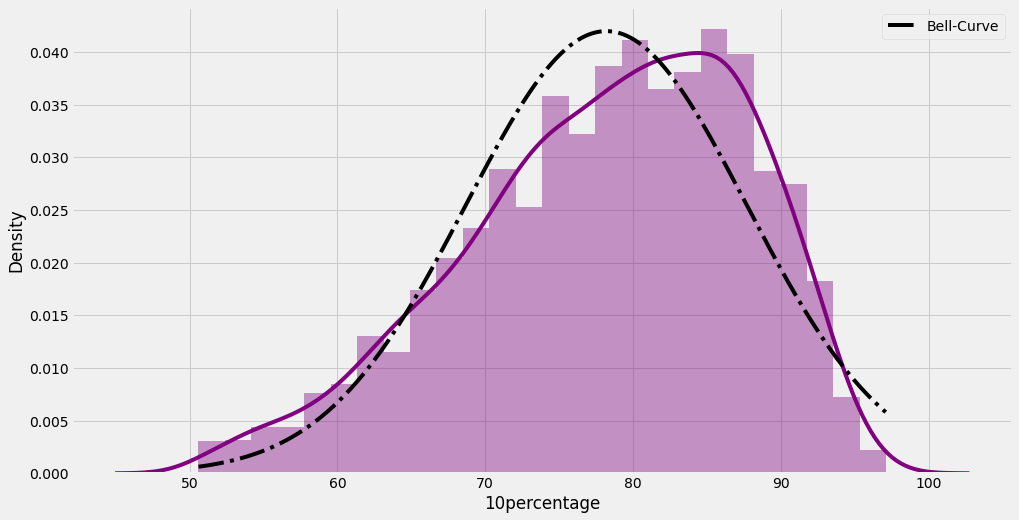

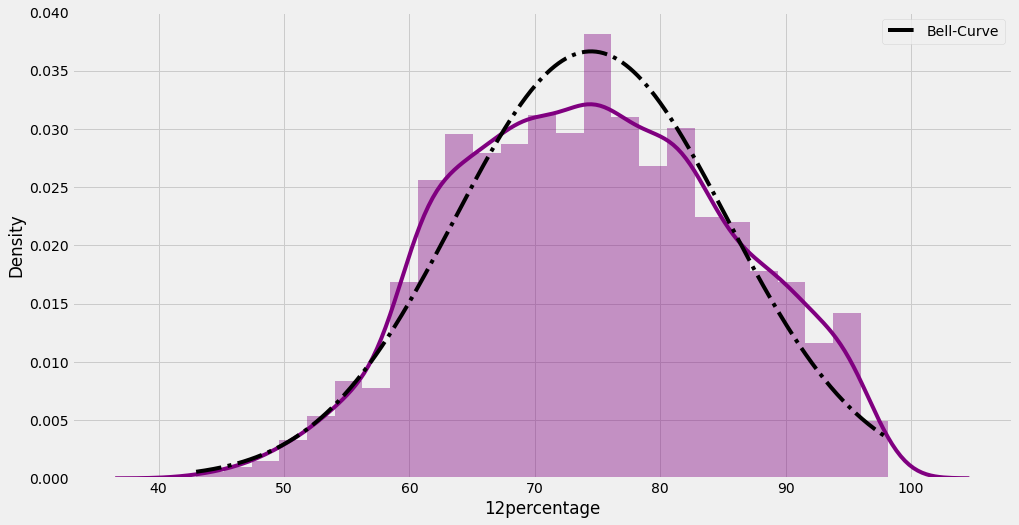

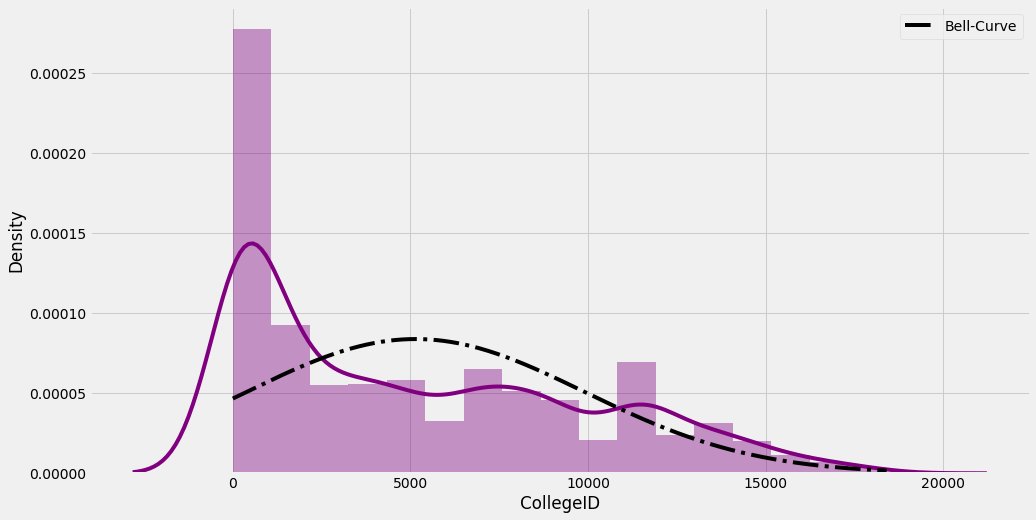

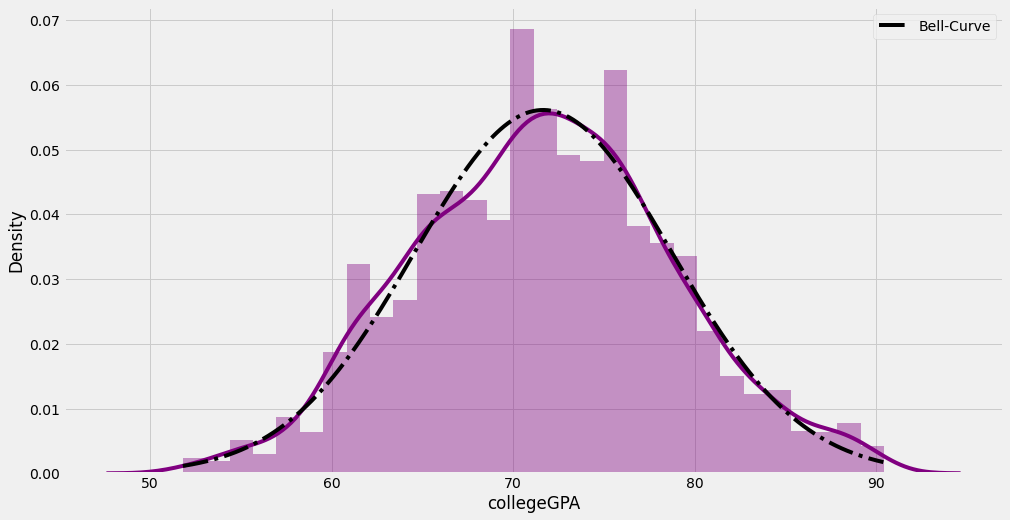

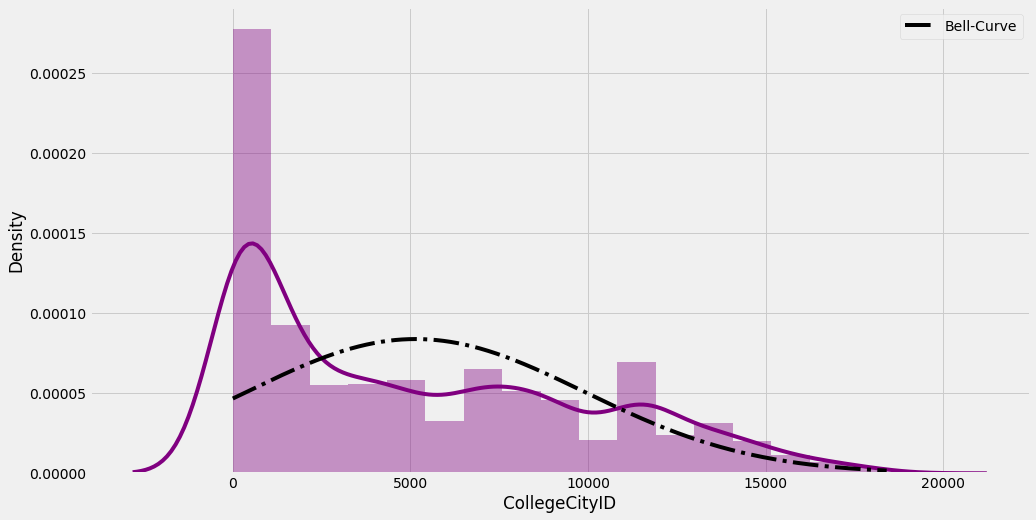

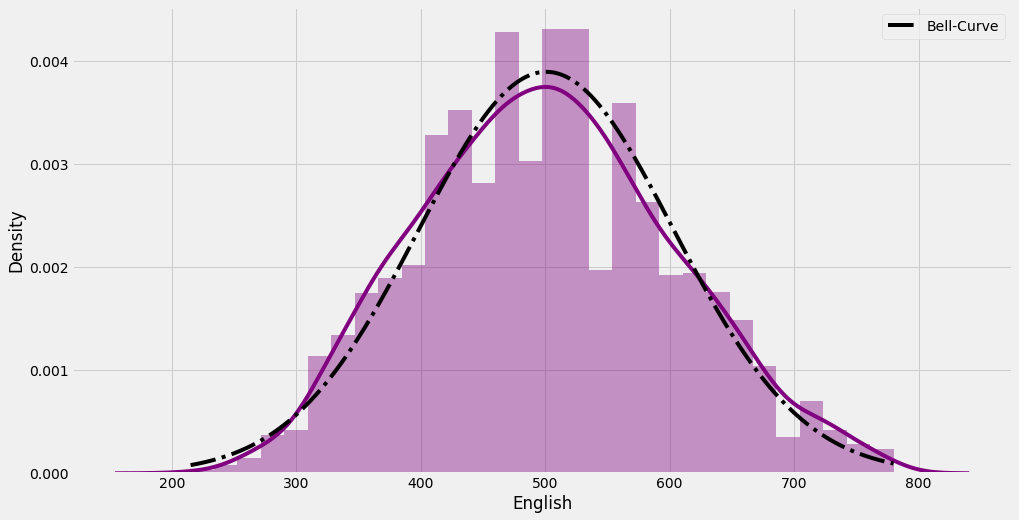

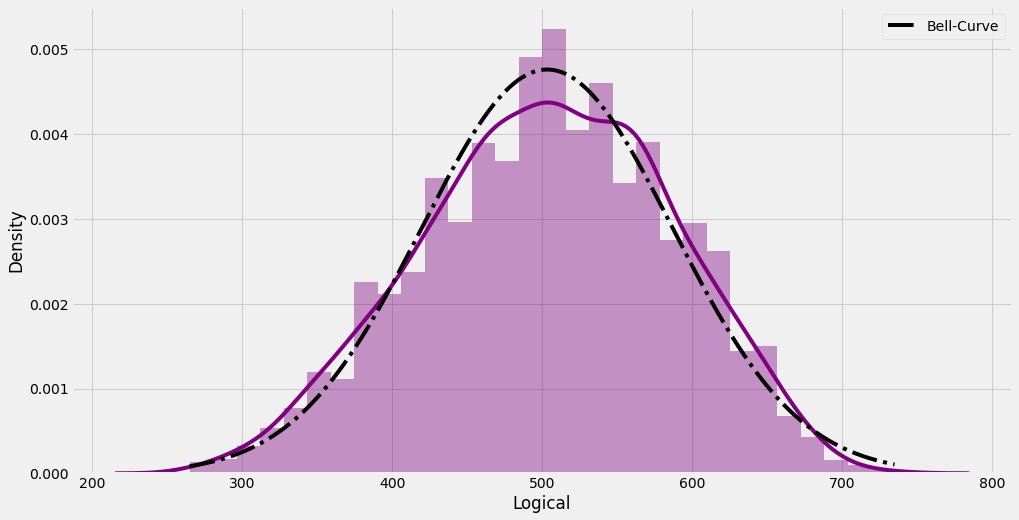

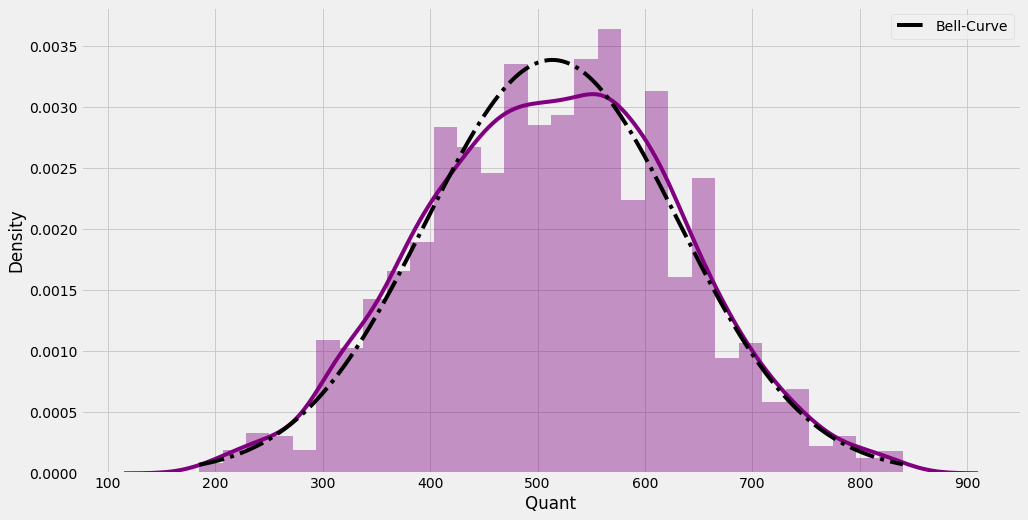

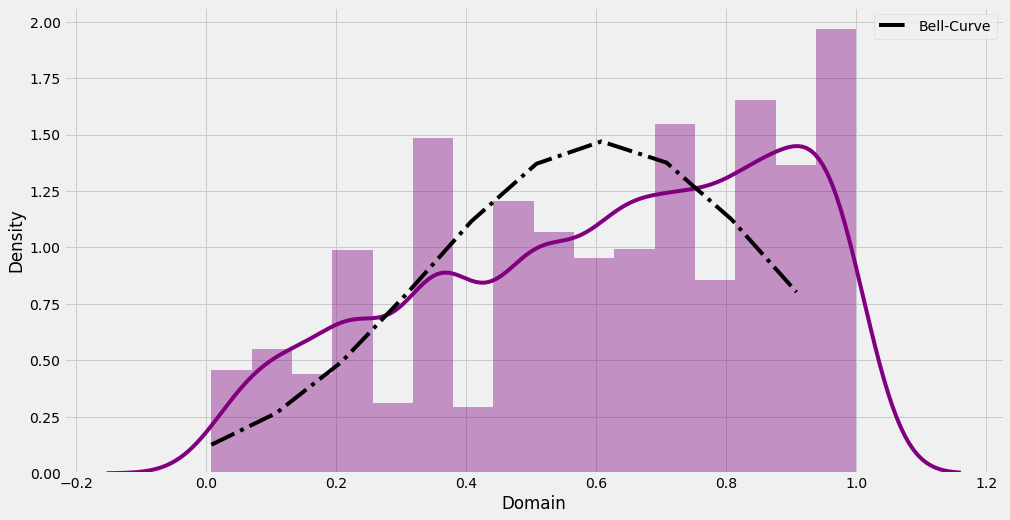

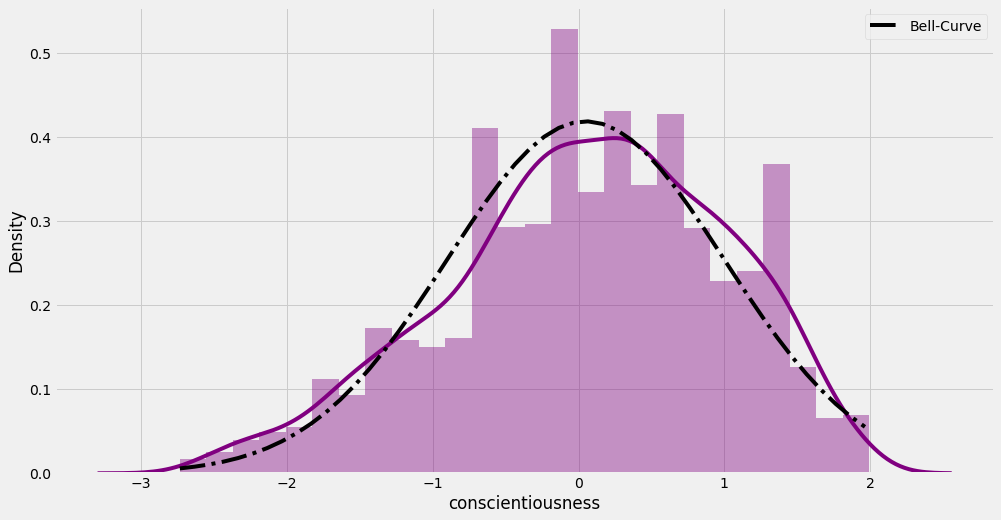

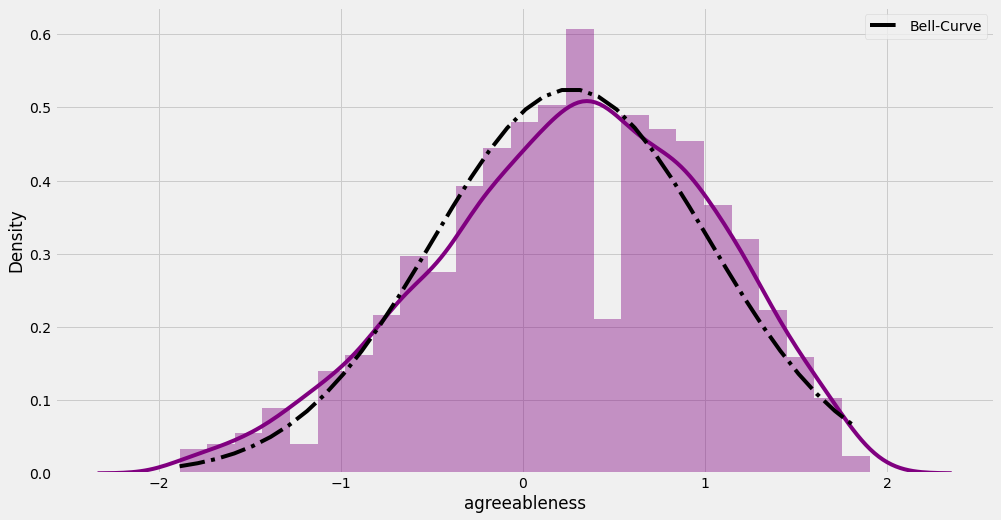

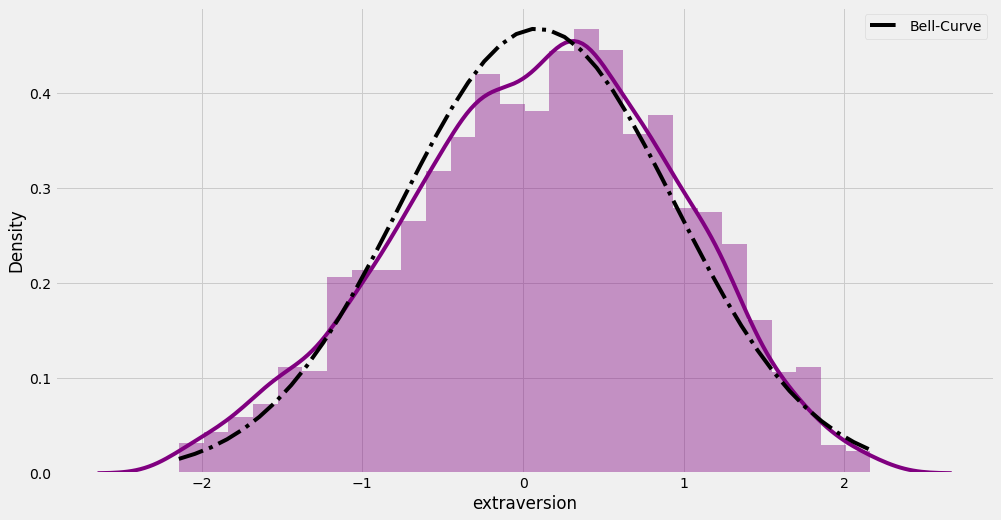

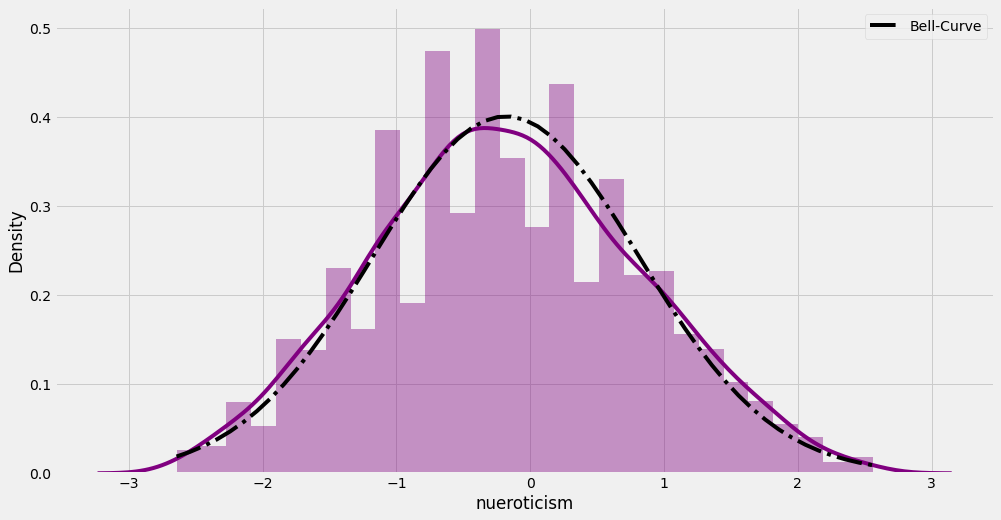

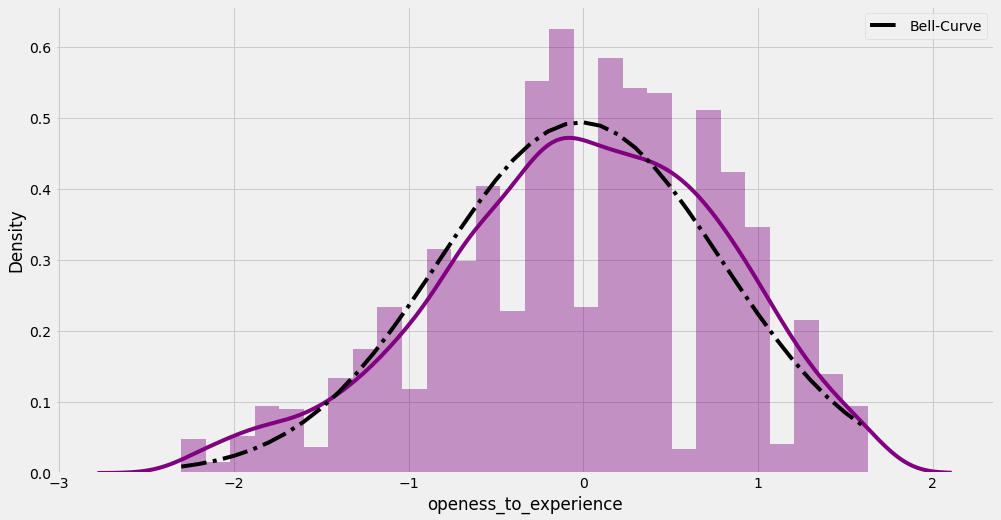

In [148]:
for column in numerical_columns:
    plt.figure(figsize=(15,8))
    sns.distplot(df[column],color='purple')
    rang = np.arange(df[column].min(),df[column].max(),0.1)
    plt.plot(rang,norm.pdf(rang,df[column].mean(),df[column].std()),color='black',ls="dashdot",label="Bell-Curve")
    plt.legend()
    plt.show()

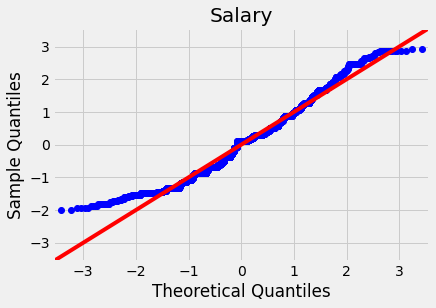

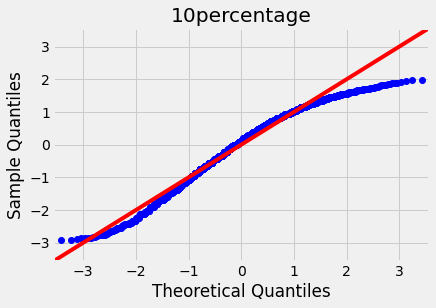

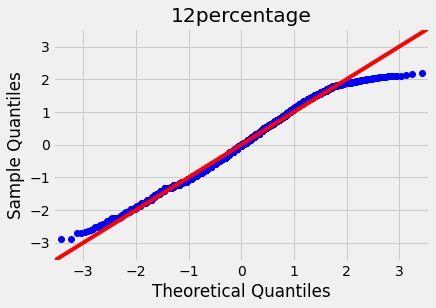

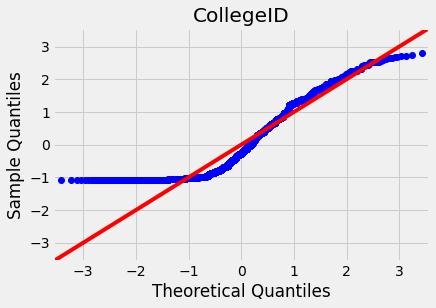

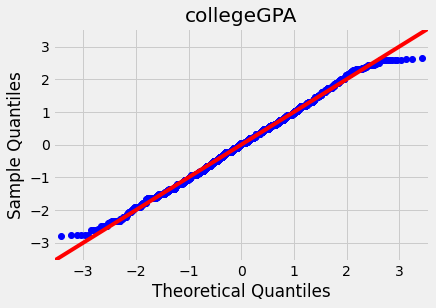

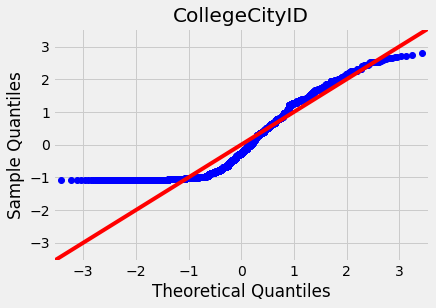

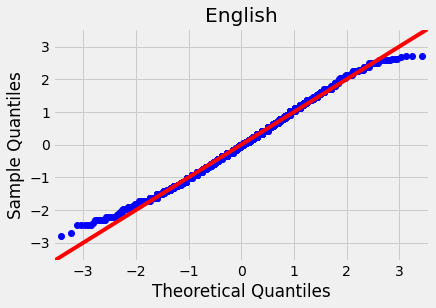

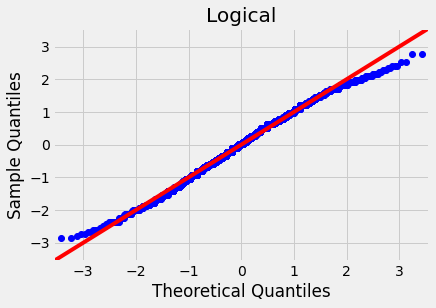

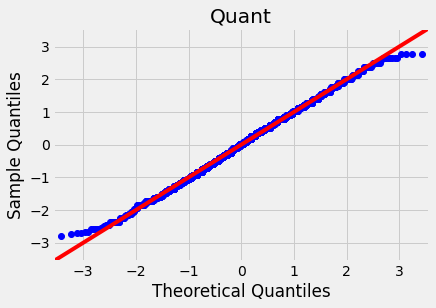

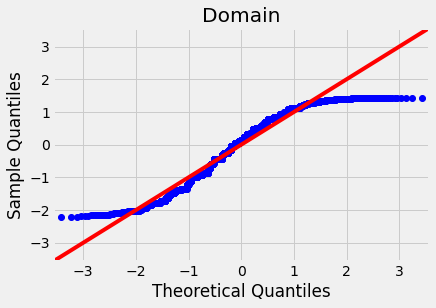

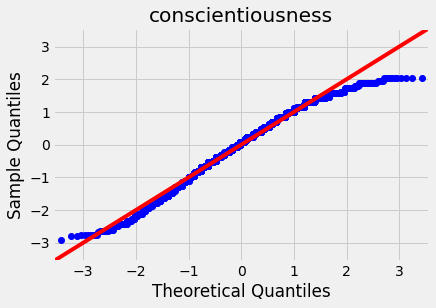

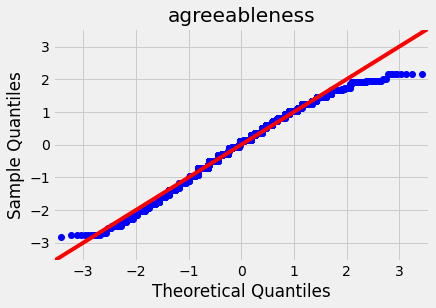

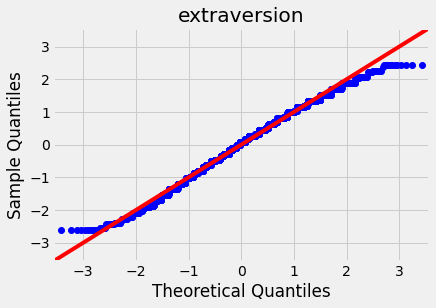

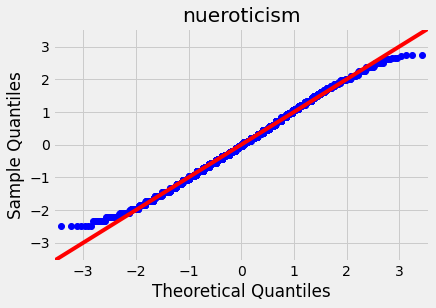

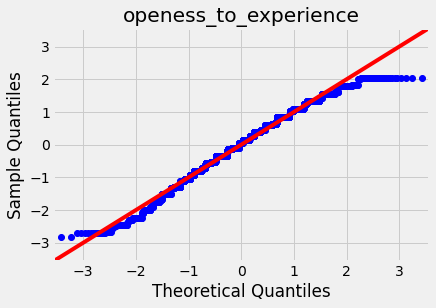

In [149]:
for col in numerical_columns:
    qqplot(df[col],line='45',fit=True)
    plt.title(col)
    plt.show()

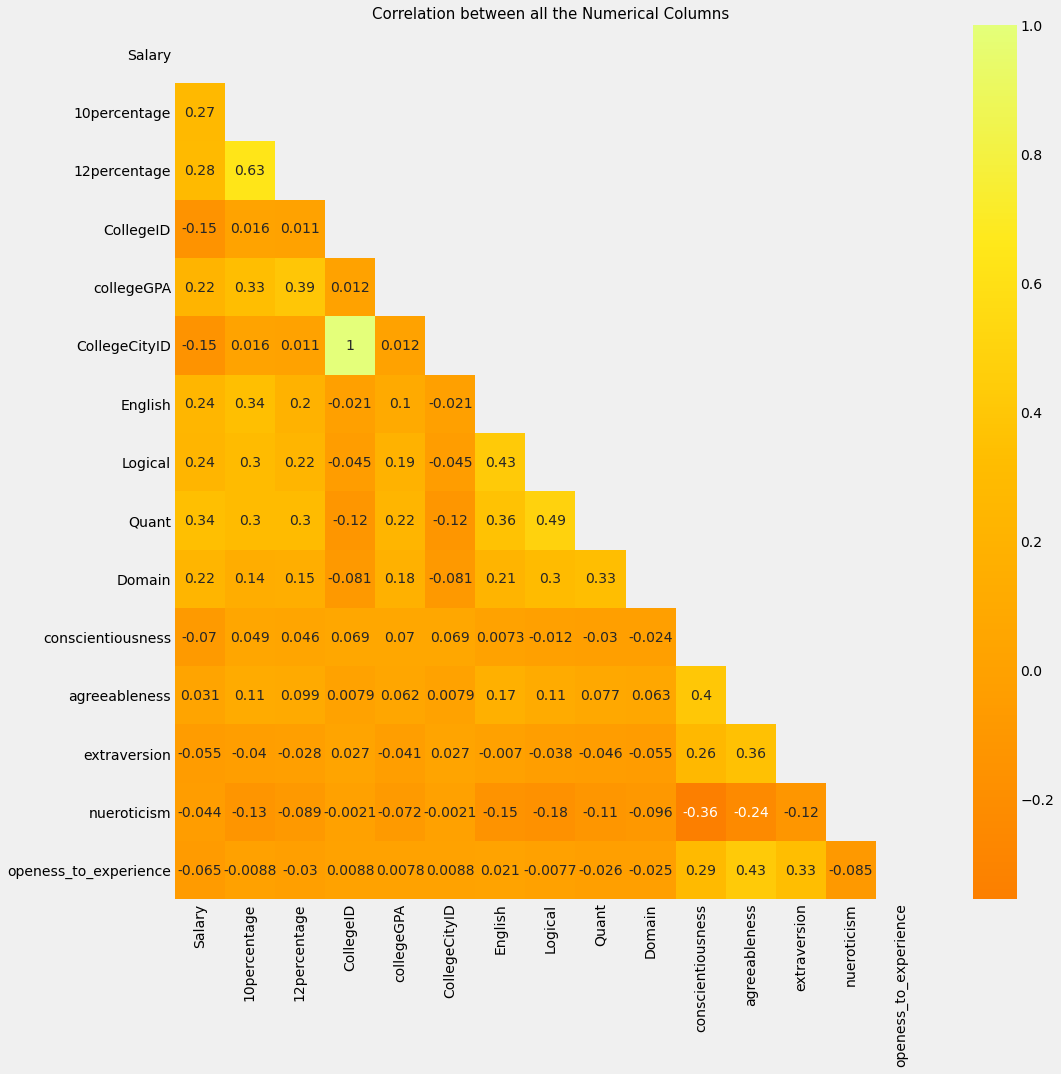

In [150]:
plt.figure(figsize=(15,15))
mask = np.triu(df[numerical_columns].corr())
sns.heatmap(df[numerical_columns].corr(),cmap='Wistia_r',mask=mask,annot=True)
plt.title("Correlation between all the Numerical Columns",fontsize=15)
plt.show()

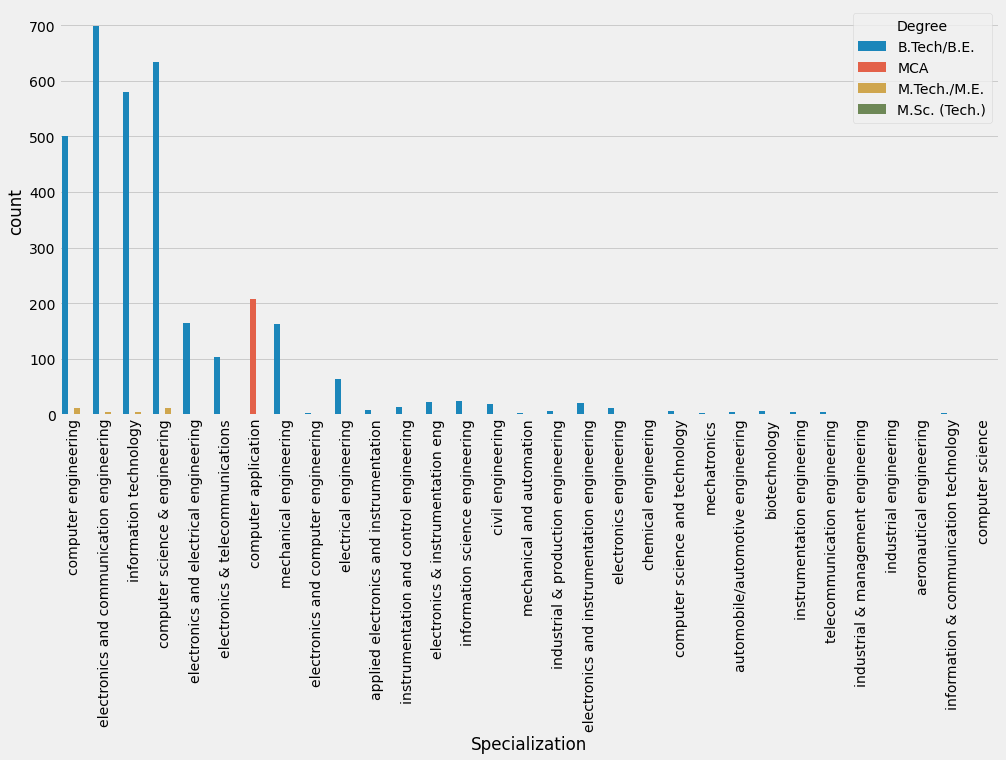

In [151]:
plt.figure(figsize=(15,7))
sns.countplot(df['Specialization'],hue='Degree',data = df)
plt.xticks(rotation = 90)
plt.show()

In [152]:
top_20_specs = df['Specialization'].value_counts().head(20).index

In [153]:
ratio = []
for spec in top_20_specs:
    spec_df = df[df["Specialization"] == spec]
    ratio_dict = spec_df["Gender"].value_counts().to_dict()
    ratio.append(ratio_dict)

In [154]:
m_ratio = []
f_ratio = []
for i in ratio:
    m_ratio.append(i.get("m"))
    f_ratio.append(i.get("f"))

In [155]:
male_female_spec_ratio = pd.DataFrame({"Columns":top_20_specs,"Male":m_ratio,"Female":f_ratio})
male_female_spec_ratio["total"] = male_female_spec_ratio[['Male','Female']].sum(axis=1)

In [156]:
male_female_spec_ratio["Male_Perc"] = male_female_spec_ratio["Male"] / male_female_spec_ratio["total"] * 100

In [157]:
male_female_spec_ratio['Female_perc'] = male_female_spec_ratio['Female'] / male_female_spec_ratio['total'] * 100

In [158]:
male_female_spec_ratio["Difference"] =abs(male_female_spec_ratio['Male_Perc'] - male_female_spec_ratio['Female_perc'])

In [159]:
male_female_spec_ratio.fillna(0,inplace=True)

In [160]:
male_female_spec_ratio.style.background_gradient(cmap='Reds')

,Columns,Male,Female,total,Male_Perc,Female_perc,Difference
0,electronics and communication engineering,524,179.000000,703.000000,74.537696,25.462304,49.075391
1,computer science & engineering,478,166.000000,644.000000,74.223602,25.776398,48.447205
2,information technology,420,163.000000,583.000000,72.041166,27.958834,44.082333
3,computer engineering,359,152.000000,511.000000,70.254403,29.745597,40.508806
4,computer application,154,55.000000,209.000000,73.684211,26.315789,47.368421
5,electronics and electrical engineering,133,32.000000,165.000000,80.606061,19.393939,61.212121
6,mechanical engineering,153,10.000000,163.000000,93.865031,6.134969,87.730061
7,electronics & telecommunications,77,26.000000,103.000000,74.757282,25.242718,49.514563
8,electrical engineering,53,11.000000,64.000000,82.812500,17.187500,65.625000
9,information science engineering,17,8.000000,25.000000,68.000000,32.000000,36.000000


In [161]:
male_female_spec_ratio.set_index("Columns",inplace=True)

<Figure size 1080x576 with 0 Axes>

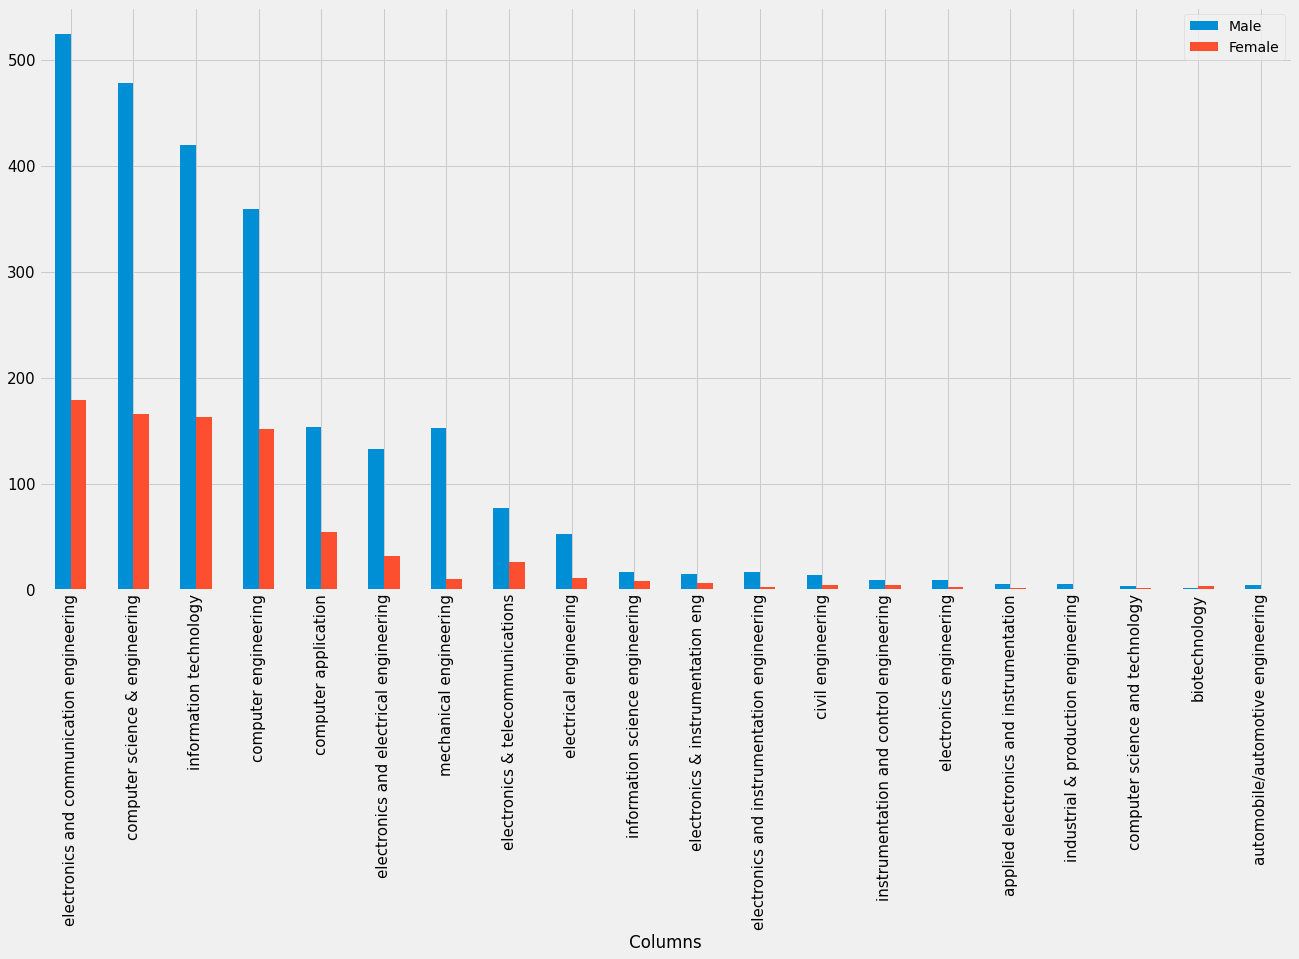

In [162]:
plt.figure(figsize=(15,8))
male_female_spec_ratio[["Male","Female"]].plot(kind="bar",figsize=(20,10),fontsize=15)
plt.show()

In [163]:
df['Specialization'].value_counts().head(20)

electronics and communication engineering      703
computer science & engineering                 644
information technology                         583
computer engineering                           511
computer application                           209
electronics and electrical engineering         165
mechanical engineering                         163
electronics & telecommunications               103
electrical engineering                          64
information science engineering                 25
electronics & instrumentation eng               22
electronics and instrumentation engineering     20
civil engineering                               19
instrumentation and control engineering         14
electronics engineering                         12
applied electronics and instrumentation          8
industrial & production engineering              6
computer science and technology                  6
biotechnology                                    6
automobile/automotive engineeri

#### From the Above Observation we can see that "Male" candidates has Higher Specialization as compared to "Female".

In [164]:
# Transforming the numerical Columns.
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[numerical_columns])

In [165]:
# Encoding Categorical Columns
categorical_columns

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

In [166]:
categorical_discrete_columns

['Gender', 'Degree']

In [167]:
df[categorical_columns].nunique()

Designation       389
JobCity           286
Gender              2
10board           245
12board           293
Degree              4
Specialization     31
CollegeState       25
dtype: int64

In [168]:
df['Gender'] = df['Gender'].map({"m":1,"f":2})

In [169]:
degree_labels = df['Degree'].value_counts().sort_values().index

In [170]:
degree_dict = {i:k for k,i in enumerate(degree_labels,0)}

In [171]:
df['Degree'] = df['Degree'].map(degree_dict)

In [174]:
# For the remaining columns we can make dummmy variables.
for col in ["Designation","JobCity","10board","12board","Specialization","CollegeState"]:
    dummy_df = pd.get_dummies(df[col],drop_first=True)
    print(col)
    df = pd.concat([df,dummy_df])
#     df.drop(col,axis=1,inplace=True)

Designation


MemoryError: Unable to allocate 929. MiB for an array with shape (1148, 106016) and data type float64